In [1]:
from core import *
from modelparamgrid import *

C:\Users\tikyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\aeon\base\__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(


In [2]:
with open("../cpsl.pkl", "rb") as f:
    cpsl = pickle.load(f)

In [3]:
# load the filtered prediction
with open("../collection_models_prediction_filtered.pkl", "rb") as f:
    collection_models_prediction_filtered = pickle.load(f)

model=collection_models_prediction_filtered

res=[]
for i in range(len(TIMESERIES)):
    df=ReadAndPreProcess(TIMESERIES[i])
    for j in range(0,98):
        res.append(suss(df.iloc[:,j].values))
f1_margin=statistics.mean(res)

In [4]:
#load dataframe for 21 videos
with open("../dfl.pkl", "rb") as f:
    dfl = pickle.load(f)

#load groundtruth for 21 videos
with open("../gtl.pkl", "rb") as f:
    gtl = pickle.load(f)

In [5]:
distance=[]
min_dist=100000000
max_dist=0
for i in range(0,20):
    gt = gtl[i]

    for j in range(0, len(gt)-1):
        
        res=abs(int(gt[j])-int(gt[j-1]))
        if res > 200:
            continue
        distance.append(res)
        if res < min_dist:
            min_dist = res

        if res > max_dist:
            max_dist=res


print(statistics.mean(distance))
print(f'{min_dist} {max_dist}')

116.84272300469483
22 200


In [6]:
f1_margin = 70

asd


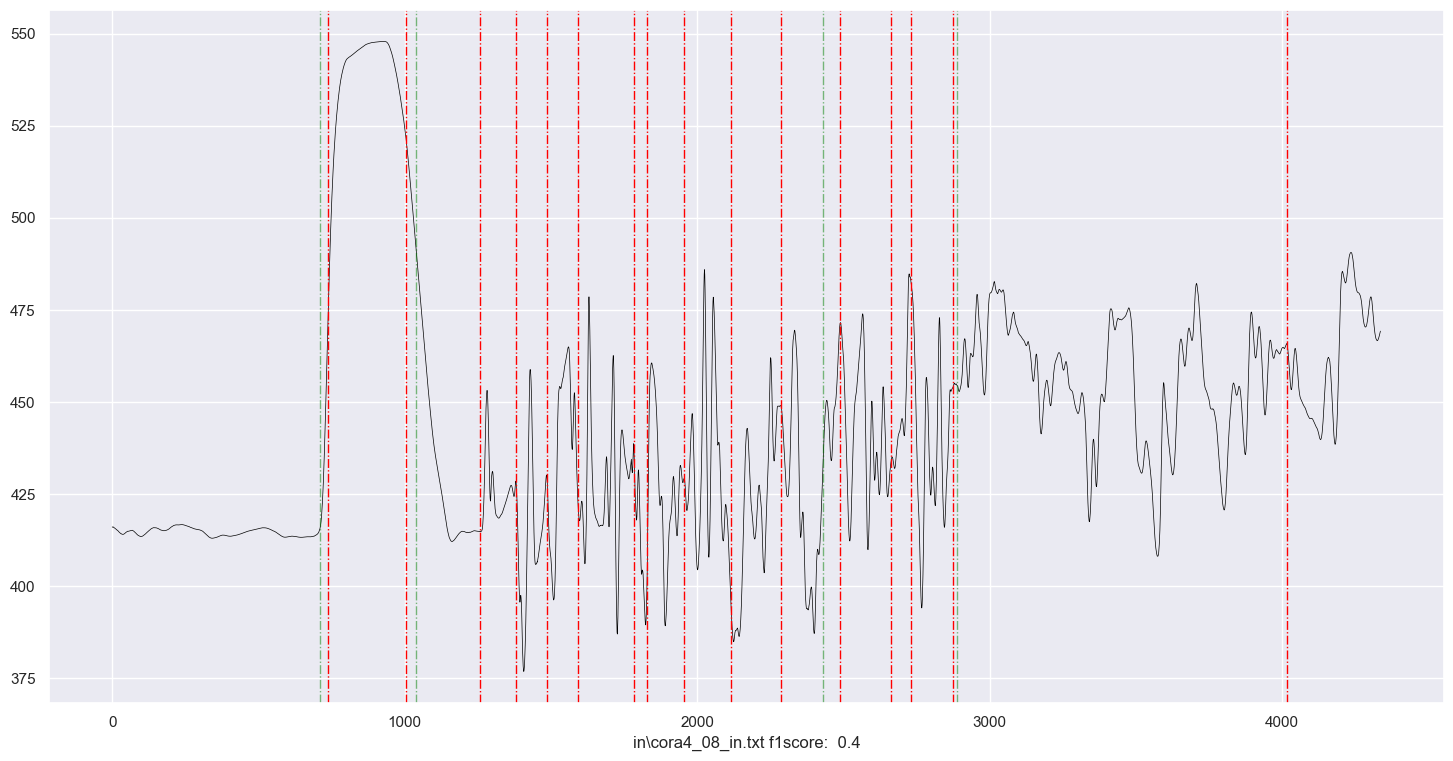

In [7]:
#cora05 density
video=2
feature=3
df = ReadAndPreProcess(TIMESERIES[video])
gt = LoadingGroundTruth(df,GROUNDTRUTH[video])
PlotResult(df,gt,cpsl[video][feature],str(TIMESERIES[video])+" f1score:",f1_margin,"",feature)

asd


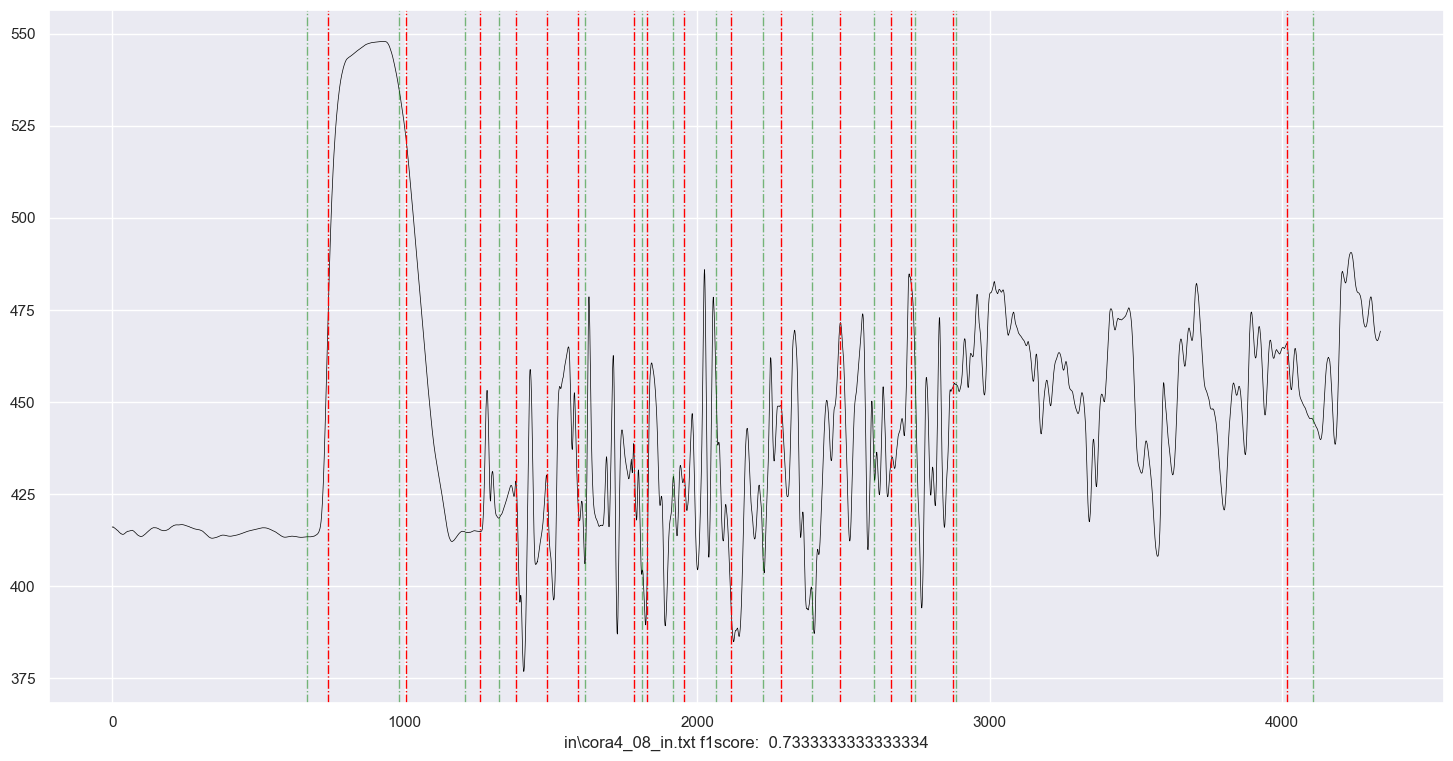

In [8]:
#cora05 density
video=2
feature=3
df = ReadAndPreProcess(TIMESERIES[video])
gt = LoadingGroundTruth(df,GROUNDTRUTH[video])
PlotResult(df,gt,model[3][0][video],str(TIMESERIES[video])+" f1score:",f1_margin,"",feature)

asd
asd
asd
asd
asd
asd
asd


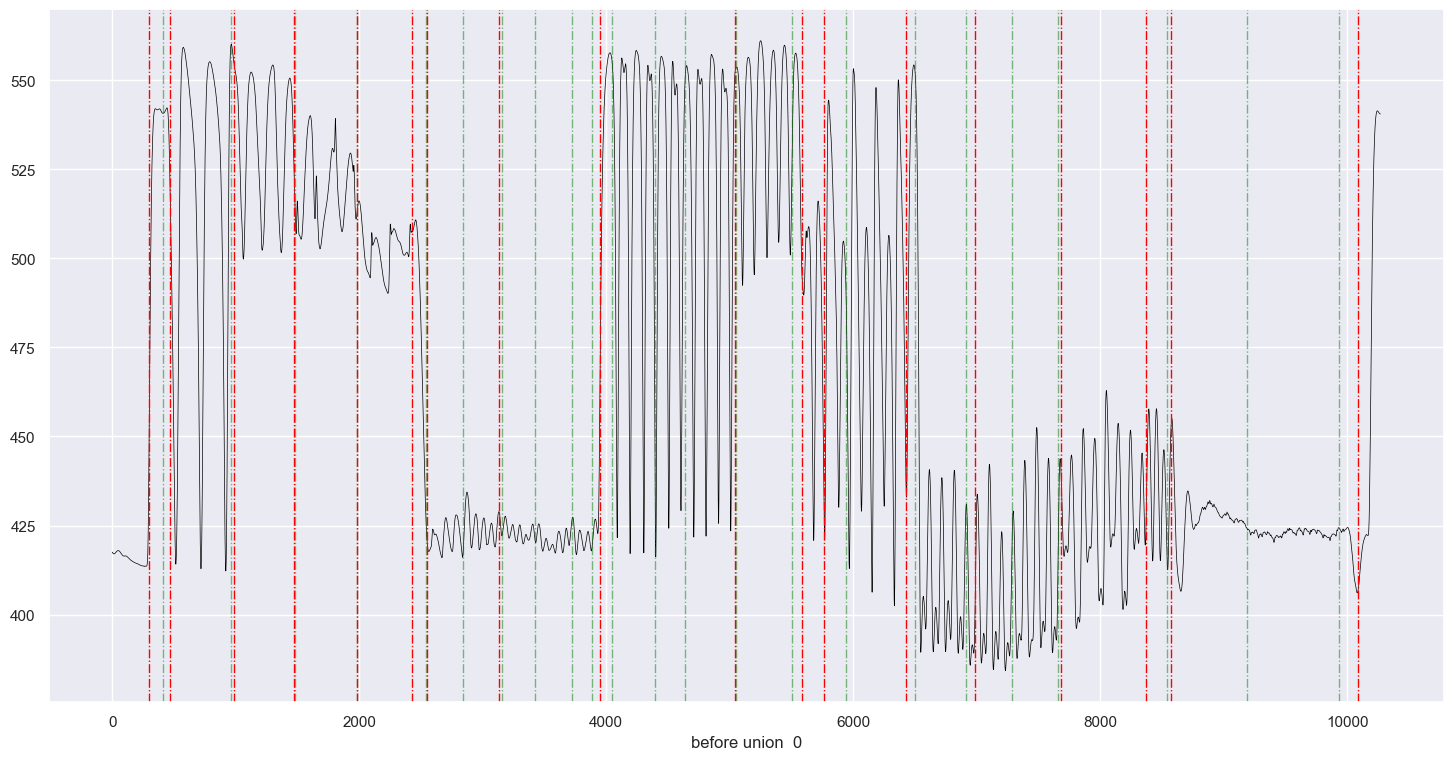

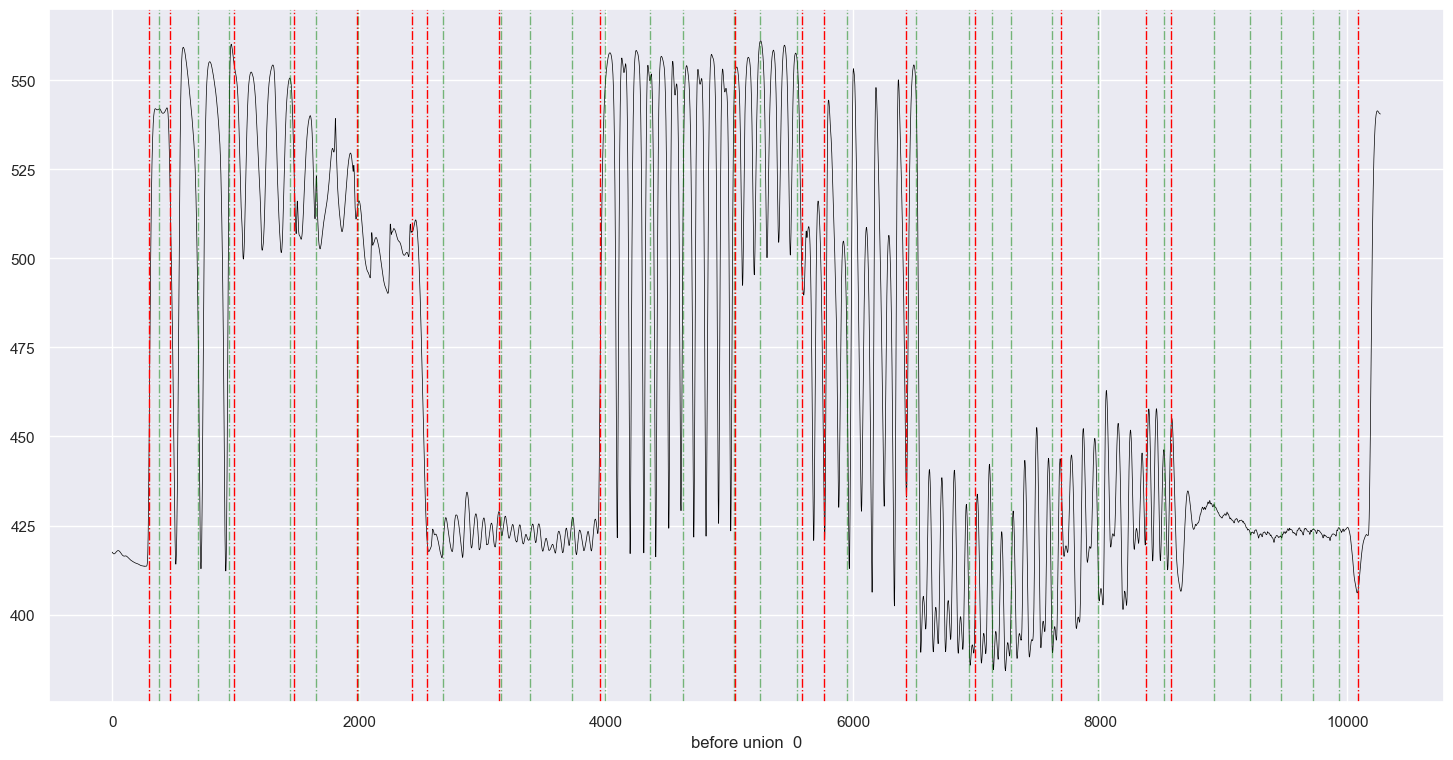

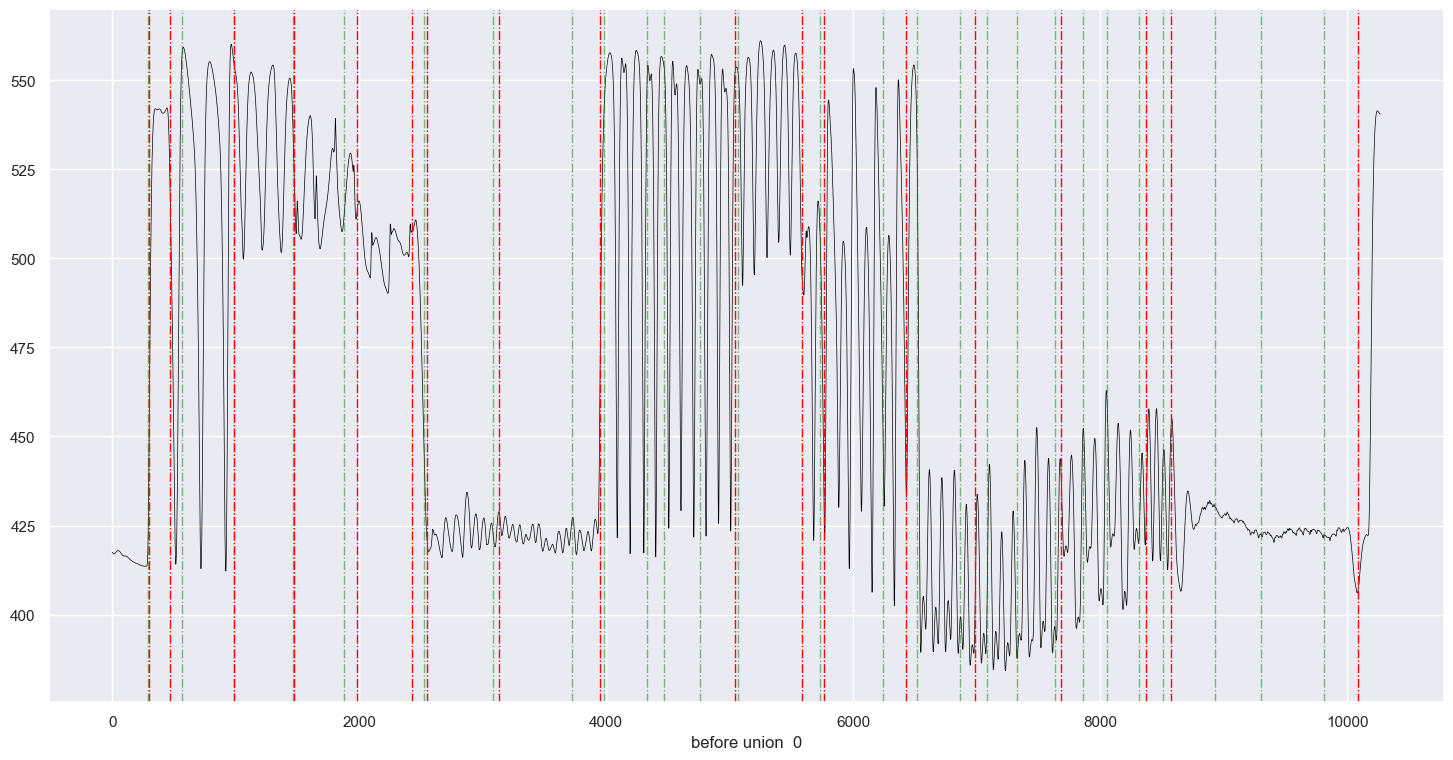

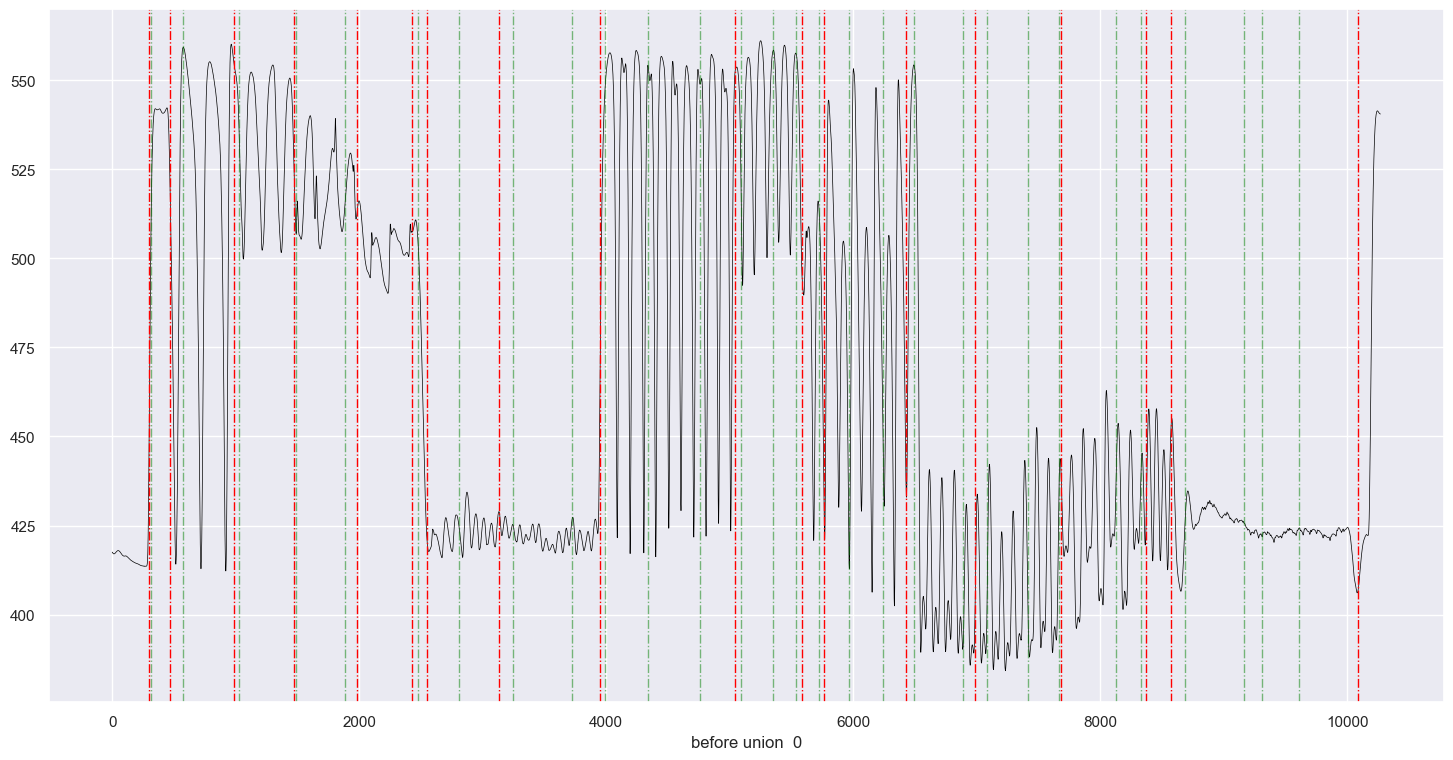

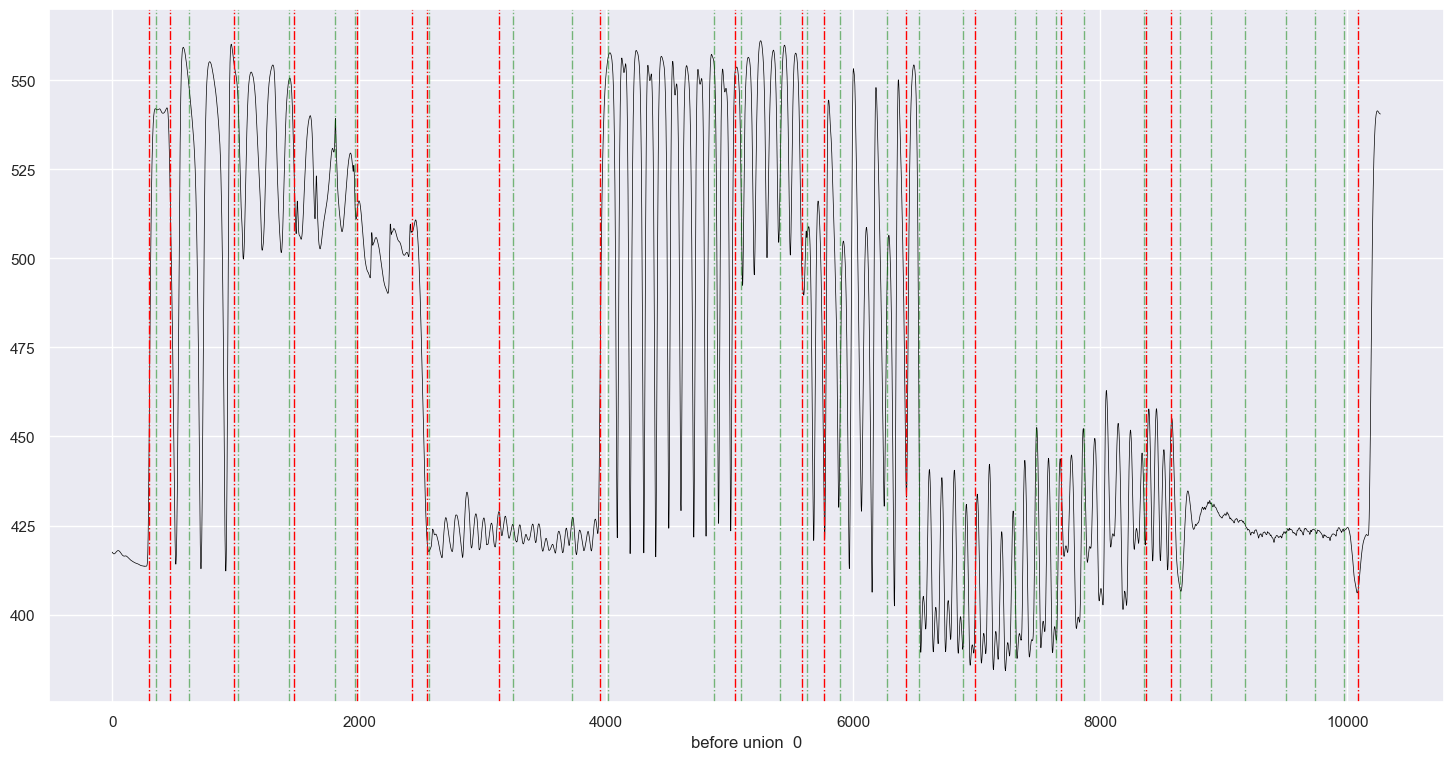

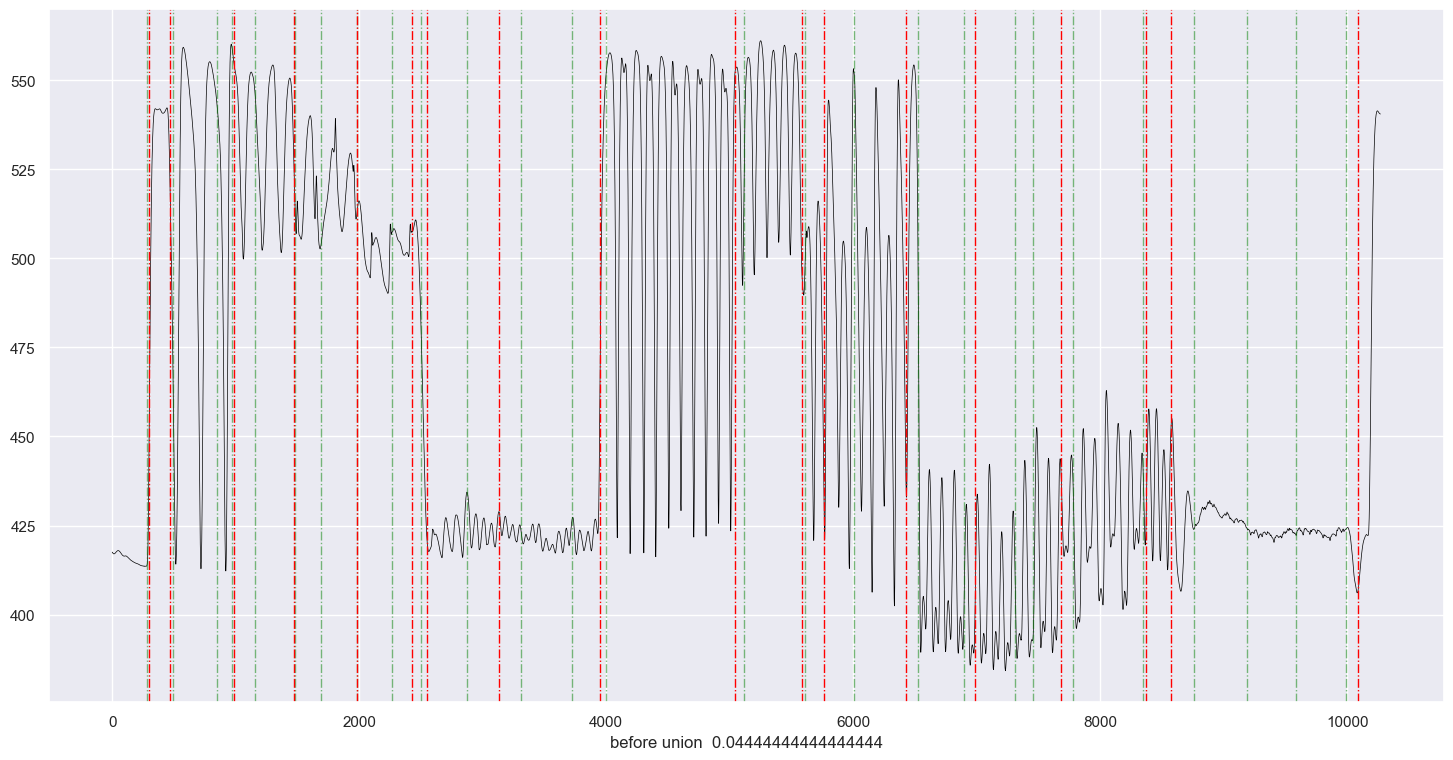

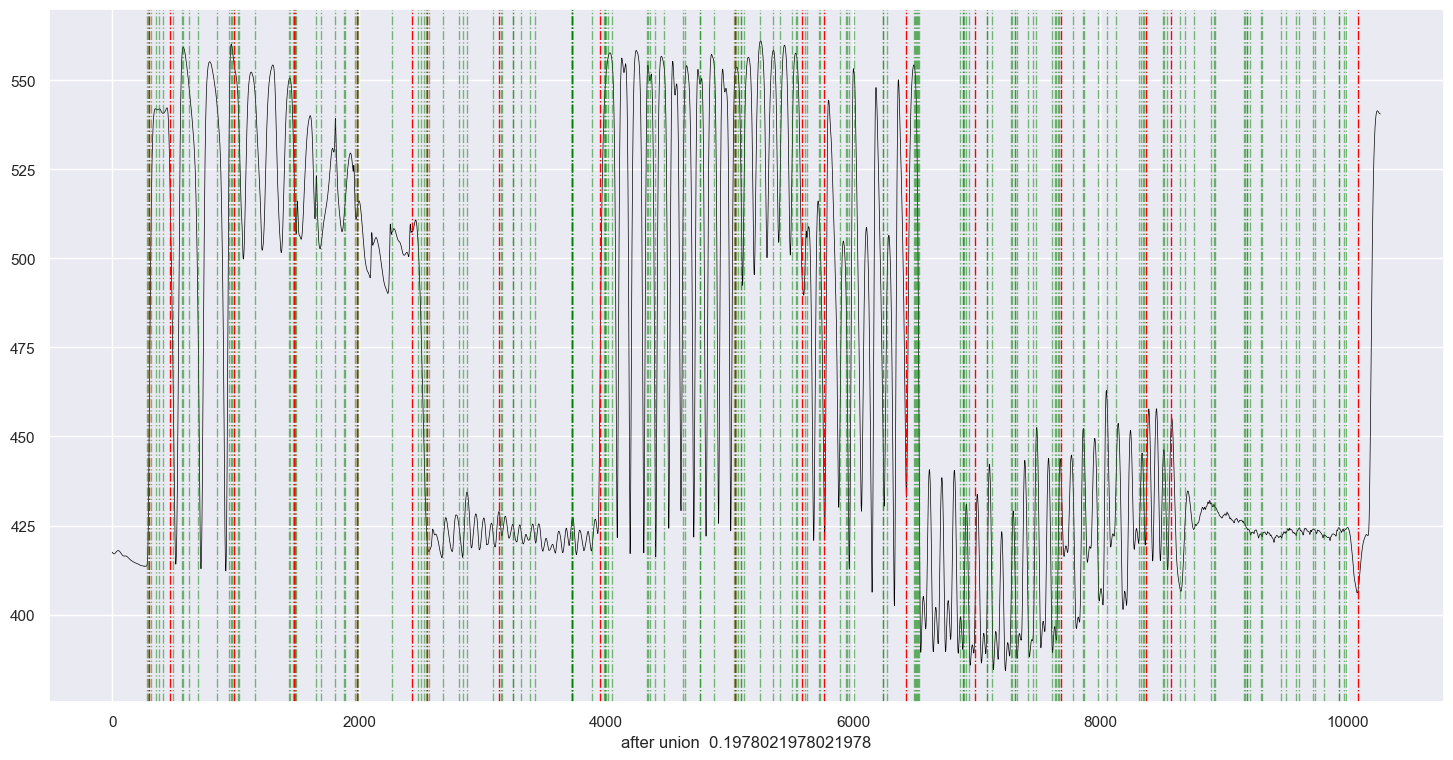

In [12]:
df=dfl[3]
gt=gtl[3]
pred=np.array(cpsl[3],dtype="object")
ariel_el=[26,27,28,29,30,31,32,33,34,35,36,37,2,8,14,0,3]
ariel = UnionCPS(*pred[ariel_el])

strn_el=[38,39,40,41,42,43,44,45,46,47,48,49,1,9,0,3]
strn = UnionCPS(*pred[strn_el])

rhel_el=[50,51,52,53,54,55,56,57,58,59,60,61,7,11,16,17,18,21,0,3]
rhel = UnionCPS(*pred[rhel_el])

lhel_el=[62,63,64,65,66,67,68,69,70,71,72,73,6,10,16,17,19,20,0,3]
lhel = UnionCPS(*pred[lhel_el])

rplm_el=[74,75,76,77,78,79,80,81,82,83,84,85,5,13,15,23,25,0,3]
rplm = UnionCPS(*pred[rplm_el])

lplm_el=[86,87,88,89,90,91,92,93,94,95,96,97,4,12,15,22,24,0,3]
lplm = UnionCPS(*pred[lplm_el])

raw=[ariel,strn,rhel,lhel,rplm,lplm]
res=[]
for i in raw:
    f = MajorityVoteCP(i,100,0)
    res.append(f)
    PlotResult(df,gt,f,"before union",100,"",3)

united = UnionCPS(*res)

PlotResult(df,gt,united,"after union",100,"",3)

